In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Carregando dados</h2>

In [32]:
df = pd.read_csv('diabetes.csv', header=None)

In [51]:
df.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [2]:
data = np.genfromtxt('diabetes.csv', delimiter=',')

In [3]:
labels = data[:,-1]
data = data[:,:-1]

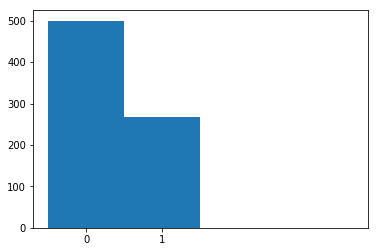

In [27]:
fig, ax = plt.subplots(1,1)
n = 3
bins=np.arange(0,n+2,1)

ax.hist(labels, bins=bins, align='left')
ax.set_xticks([0, 1])

<h2>Normalização</h2>

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [54]:
np.min(data[:,0]), np.max(data[:,0])

(0.0, 1.0)

<h2>Treinamento</h2>

In [55]:
# Modelos
# from sklearn.neural_network import MLPClassifier
# from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# K-fold CrossValidation
from sklearn.model_selection import KFold

# Métricas
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [57]:
performance = {}

modelos = ['decision_tree', 'random_forest', 'gradient_boosting']

for modelo in modelos:
    performance[modelo] = {
        'acuracia': [],
        'recall': [],
        'precisao': []
    }

In [58]:
kf = KFold(n_splits=10)

for train_index, test_index in kf.split(data):
    
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    bt = GradientBoostingClassifier(n_estimators=10)
    
    # Treino
    dt.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    bt.fit(X_train, y_train)
    
    # Avaliação
    ## Decision Tree
    dt_predict = dt.predict(X_test)
    
    dt_acc = accuracy_score(y_test, dt_predict)
    dt_recall = recall_score(y_test, dt_predict)
    dt_precision = precision_score(y_test, dt_predict)
    
    performance['decision_tree']['acuracia'].append(dt_acc)
    performance['decision_tree']['recall'].append(dt_recall)
    performance['decision_tree']['precisao'].append(dt_precision)
    
    ## Random Forest
    rf_predict = rf.predict(X_test)
    
    rf_acc = accuracy_score(y_test, rf_predict)
    rf_recall = recall_score(y_test, rf_predict)
    rf_precision = precision_score(y_test, rf_predict)
    
    performance['random_forest']['acuracia'].append(rf_acc)
    performance['random_forest']['recall'].append(rf_recall)
    performance['random_forest']['precisao'].append(rf_precision)
    
    ## Gradient Boosting
    bt_predict = bt.predict(X_test)
    
    bt_acc = accuracy_score(y_test, bt_predict)
    bt_recall = recall_score(y_test, bt_predict)
    bt_precision = precision_score(y_test, bt_predict)
    
    performance['gradient_boosting']['acuracia'].append(bt_acc)
    performance['gradient_boosting']['recall'].append(bt_recall)
    performance['gradient_boosting']['precisao'].append(bt_precision)

In [59]:
print("Resultados - Acurácia")
print("Decision Tree: {}".format(np.round(np.mean(performance['decision_tree']['acuracia']),2)))
print("Random Forest: {}".format(np.round(np.mean(performance['random_forest']['acuracia']),2)))
print("Gradient Boosting Tree: {}".format(np.round(np.mean(performance['gradient_boosting']['acuracia']),2)))

Resultados - Acurácia
Decision Tree: 0.69
Random Forest: 0.75
Gradient Boosting Tree: 0.75


In [60]:
print("Resultados - Recall")
print("Decision Tree: {}".format(np.round(np.mean(performance['decision_tree']['recall']),2)))
print("Random Forest: {}".format(np.round(np.mean(performance['random_forest']['recall']),2)))
print("Gradient Boosting Tree: {}".format(np.round(np.mean(performance['gradient_boosting']['recall']),2)))

Resultados - Recall
Decision Tree: 0.54
Random Forest: 0.56
Gradient Boosting Tree: 0.45


In [61]:
print("Resultados - Precision")
print("Decision Tree: {}".format(np.round(np.mean(performance['decision_tree']['precisao']),2)))
print("Random Forest: {}".format(np.round(np.mean(performance['random_forest']['precisao']),2)))
print("Gradient Boosting Tree: {}".format(np.round(np.mean(performance['gradient_boosting']['precisao']),2)))

Resultados - Precision
Decision Tree: 0.54
Random Forest: 0.67
Gradient Boosting Tree: 0.75
